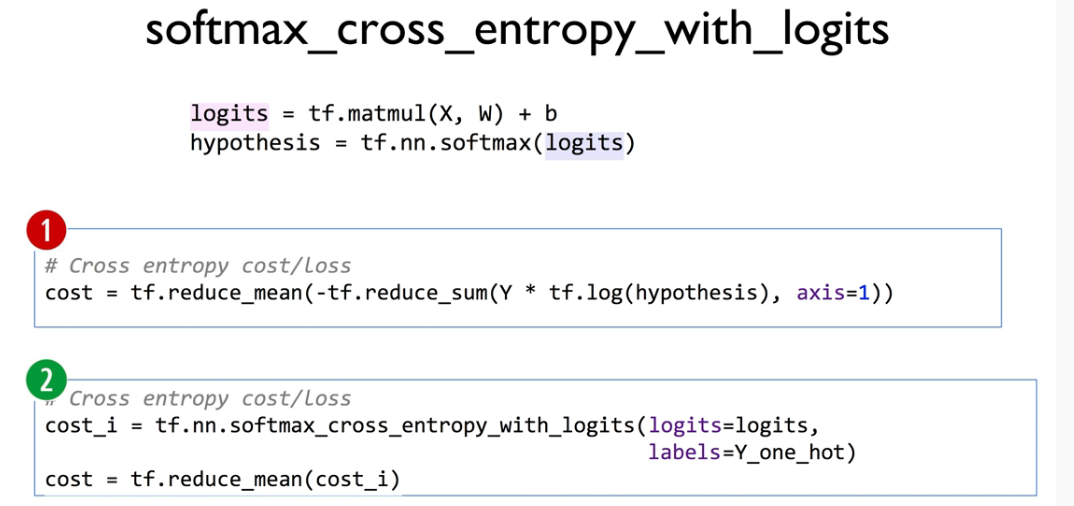

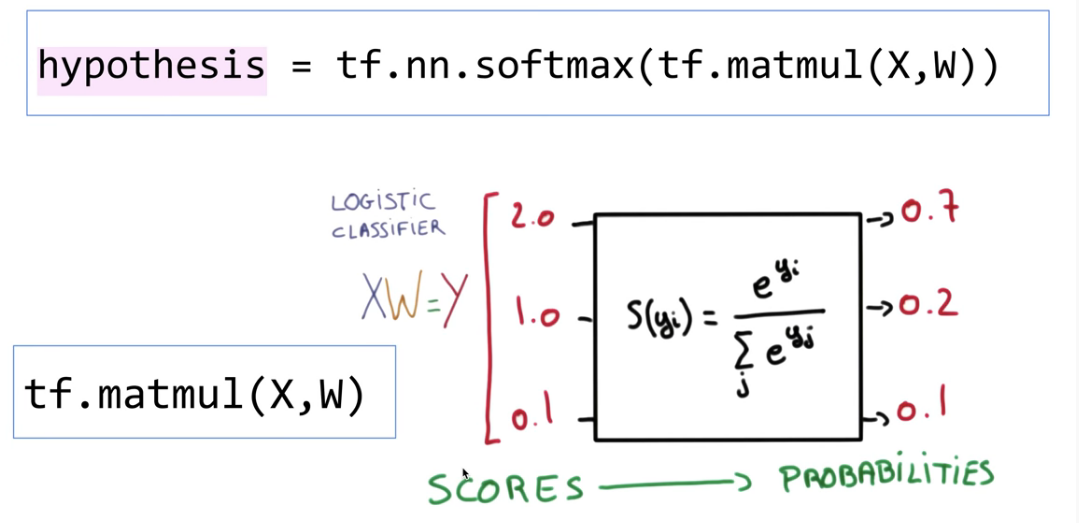

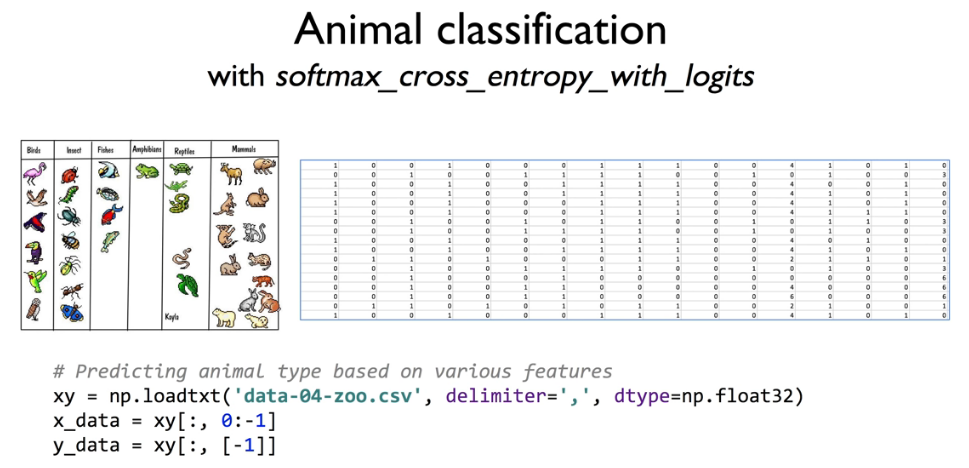

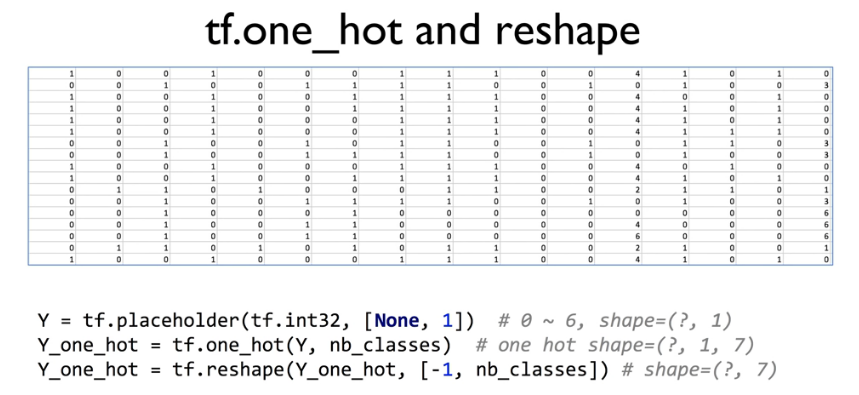

In [48]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

In [49]:
# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter = ',', dtype = np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [50]:
print(x_data.shape, y_data.shape)

(101, 16) (101, 1)


In [51]:
nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6, shape = (?, 7)

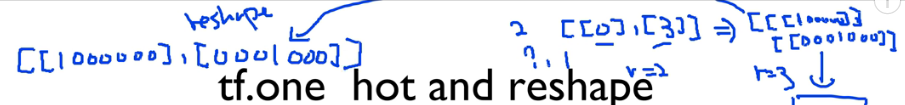

In [52]:
Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot shape = (?, 1, 7)
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) # decrease one dimension, shape = (?, 7)
print("reshape one_hot:", Y_one_hot) 

one_hot: Tensor("one_hot_1:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape_1:0", shape=(?, 7), dtype=float32)


In [53]:
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight') # nb_classes = 7
b = tf.Variable(tf.random_normal([nb_classes]), name='bias') # nb_classes = 7

In [54]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

In [55]:
cost = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = tf.stop_gradient([Y_one_hot]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [56]:
prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [59]:
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001) :
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy],
                                        feed_dict={X: x_data, Y: y_data})
    """ if step % 100 == 0:
        print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, float(cost_val), float(acc_val)))"""    
    
    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})

    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P